## Final Project - Data Science Capstone

By Sara Elgayar

Data Science Masters student at University of Rochester

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## LOAD DATASET

In [5]:
pricing = pd.read_csv('2022 Data/pricinghistory-by-month-locationnbr-40.csv')

In [6]:
week_items = pd.read_csv('2022 Data/aggregatedsales-by-week-locationnbr-40.csv')

In [7]:
month_items = pd.read_csv('2022 Data/aggregatedsales-by-month-locationnbr-40.csv')

In [8]:
dates = pd.read_csv('2022 Data/dates.csv')

In [9]:
items = pd.read_csv('2022 Data/items.csv')

In [10]:
transactions = pd.read_csv('2022 Data/transactions-locationnbr-40.csv')

In [ ]:
transactions.info()

## EDA

In [11]:
week_items_desc = pd.merge(week_items, items, on='ITEM_NBR')


## 1. Explore the Frequency of most popular departments in the dataset

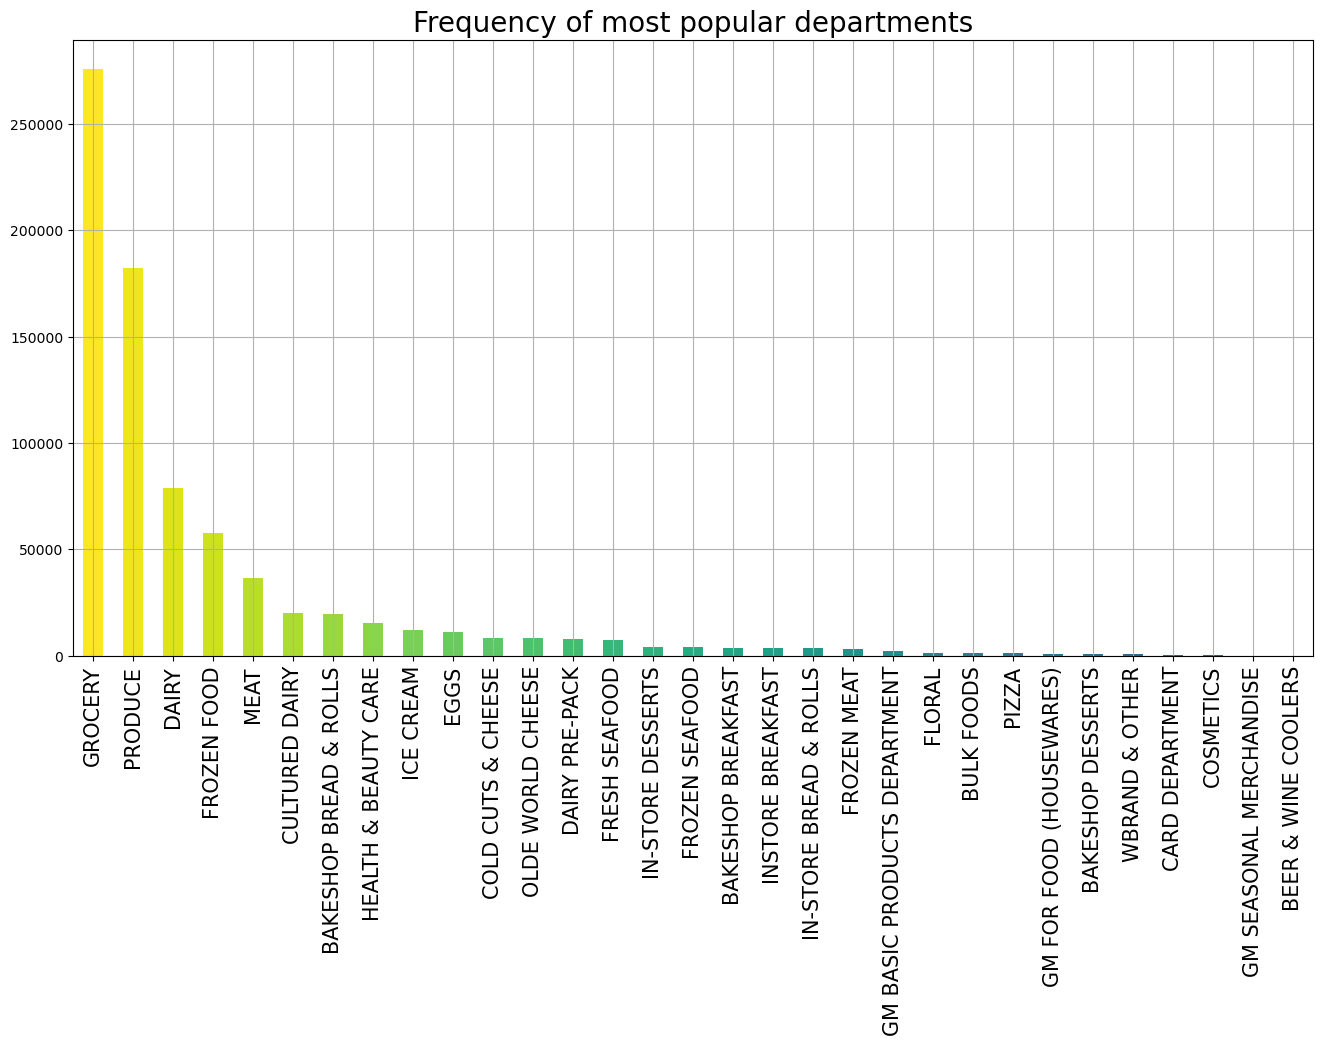

In [407]:
color = plt.cm.viridis_r(np.linspace(0, 1, 40))
transactions_item_data['DEPARTMENT_NAME'].value_counts().head(40).plot.bar(color = color, figsize=(16,8))
plt.title('Frequency of most popular departments', fontsize = 20)
plt.xticks(rotation = 90 ,fontsize = 15 )
plt.grid()
plt.show()


## 2. Explore the most popular brands in the dataset

In [408]:
sort_list = transactions_item_data['BRAND_NAME'].value_counts().head(15).index.tolist()
sort_list = pd.DataFrame(sort_list, columns=['BRAND_NAME'])

In [409]:
sort_list=sort_list.reset_index()

In [414]:
sort_list = sort_list[sort_list.BRAND_NAME != '[Not Set]']
sort_list

,index,BRAND_NAME
0,0,Wegmans
2,2,Kellogg's
3,3,General Mills
4,4,Nabisco
5,5,McCormick
6,6,Kraft
7,7,Pepperidge Farm
8,8,Goya
9,9,Simply Orange
10,10,Quaker


In [415]:
#https://jonathansoma.com/lede/algorithms-2017/classes/networks/networkx-graphs-from-source-target-dataframe/

import networkx as nx
sort_list['food'] = 'BRANDs'
sort_list = nx.from_pandas_edgelist(sort_list, source = 'food', target= 'BRAND_NAME', edge_attr = True)


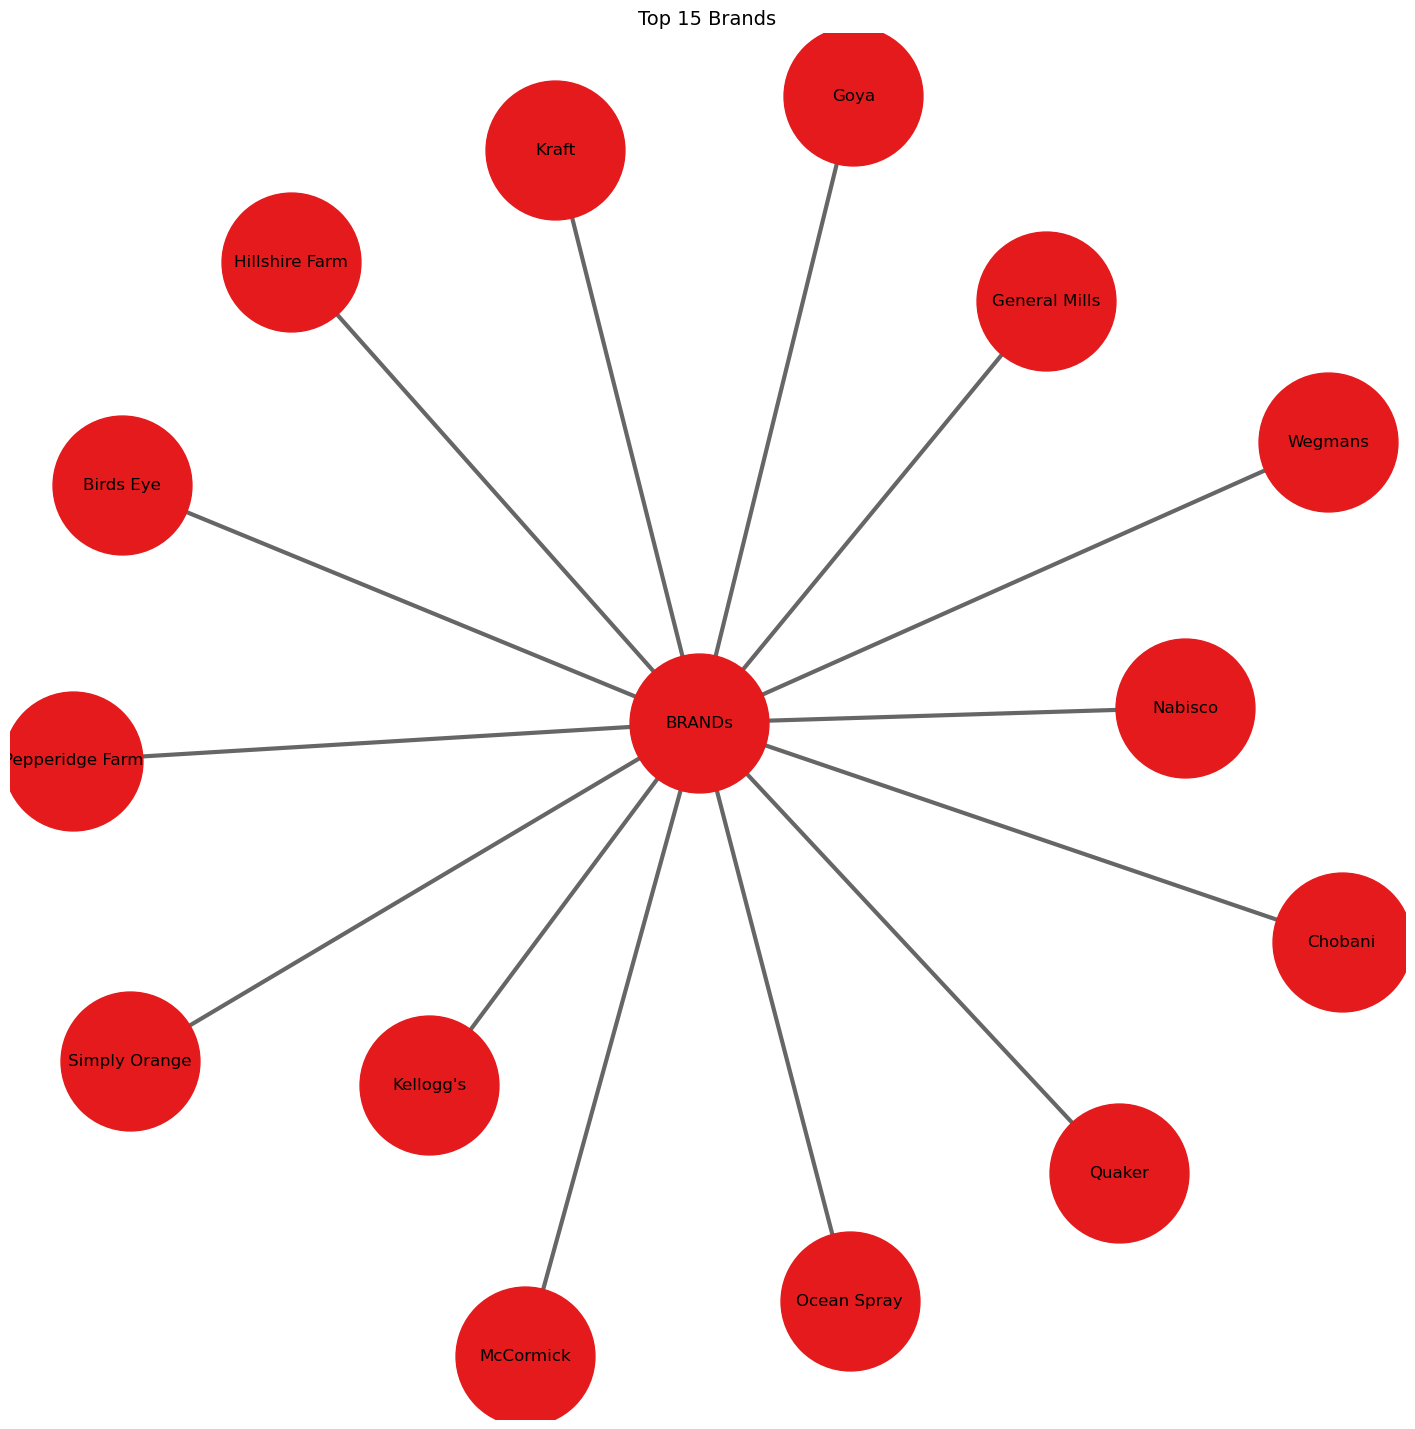

In [417]:

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 18)
pos = nx.spring_layout(sort_list)
color = plt.cm.Set1(np.linspace(0,90 15, 1))
nx.draw_networkx_nodes(sort_list, pos, node_size = 10000, node_color = color)
nx.draw_networkx_edges(sort_list, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(sort_list, pos, font_size = 12, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Brands', fontsize = 14)
plt.show()


## 3. Distribution of the fastpick items in the dataset 

In [22]:
items['IS_CURRENT_WOODMORE_FASTPICK_FLG'].value_counts()

0    154275
1       879
Name: IS_CURRENT_WOODMORE_FASTPICK_FLG, dtype: int64

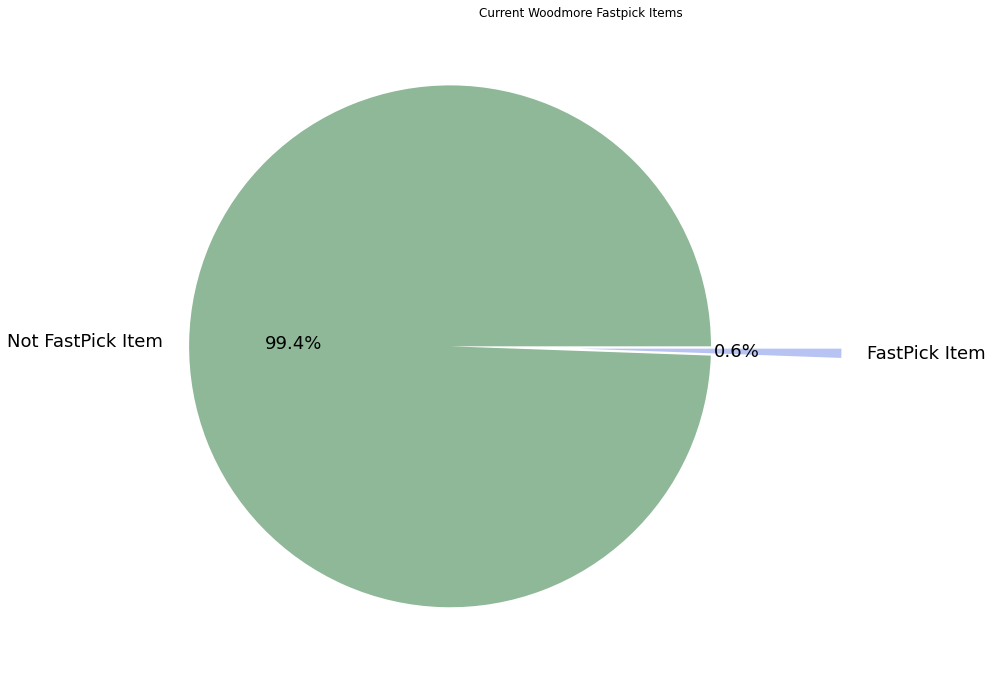

In [29]:
import matplotlib.pyplot as plt
colors= ['#8EB897','#B7C3F3'  ,'#DD7596']
labels = 'Not FastPick Item', 'FastPick Item'

# set figure size
plt.rcParams['figure.figsize'] = (16, 12)

fig1, ax1 = plt.subplots()
plt.pie(items['IS_CURRENT_WOODMORE_FASTPICK_FLG'].value_counts(),
        autopct='%1.1f%%',
        explode=[0.5,0], 
        colors=colors, 
        labels = labels,
       textprops={'fontsize': 18})
plt.title('Current Woodmore Fastpick Items')

plt.show()

## TOP SELLERS BY WEEK

In [188]:
transactions_item_data = pd.merge(transactions, items, how='inner')

In [189]:
transactions_item_data = pd.merge(transactions_item_data, dates, how='inner')

In [190]:
transactions_item_data = pd.merge(transactions_item_data, pricing, how='inner')

In [191]:
transactions_item_data = pd.merge(transactions_item_data, week_items, how='inner')

## SEGMENT DATA BY WEEKS

In [474]:
items_count = transactions_item_data.groupby(['FSCL_WEEK_NBR', 'CLASS_NAME'])['UNITS_SOLD'].sum().reset_index(name='TOTAL').sort_values(['FSCL_WEEK_NBR','TOTAL'], ascending=False)


In [475]:
week_48_top_250 = items_count[items_count['FSCL_WEEK_NBR']==48].head(250)

In [476]:
Top250_week_48 = pd.merge(week_48_top_250, transactions_item_data, on='CLASS_NAME')

In [477]:
Top250_week_48.to_csv('Top250_FSCL_WEEK_NBR_48.csv')

## 4. ORGANIC VS REGULAR

In [ ]:
ORGANIC_ITEMS = transactions_item_data[['ORGANIC_IND', 'CLASS_NAME', 'UNITS_SOLD', 'AVG_RETAIL_PRICE_2021_10', 'AVG_RETAIL_PRICE_2021_11', 'AVG_RETAIL_PRICE_2021_12', 'AVG_RETAIL_PRICE_2022_1', 'AVG_RETAIL_PRICE_2022_2' ,'AVG_RETAIL_PRICE_2022_3', 'AVG_RETAIL_PRICE_2022_4', 'AVG_RETAIL_PRICE_2022_5', 'AVG_RETAIL_PRICE_2022_6', 'AVG_RETAIL_PRICE_2022_7', 'AVG_RETAIL_PRICE_2022_8', 'AVG_RETAIL_PRICE_2022_9']]

In [324]:
ORGANIC_TOP_SELLERS = ORGANIC_ITEMS.groupby(['ORGANIC_IND', 'CLASS_NAME'])['UNITS_SOLD'].sum().reset_index(name='TOTAL').sort_values(['ORGANIC_IND','TOTAL'], ascending=False)


In [218]:
organic_sum   = ORGANIC_TOP_SELLERS[ORGANIC_TOP_SELLERS['ORGANIC_IND']==1]['TOTAL']
inorganic_sum = ORGANIC_TOP_SELLERS[ORGANIC_TOP_SELLERS['ORGANIC_IND']==0]['TOTAL']

([<matplotlib.axis.YTick at 0x7f7ed29c3760>,
 [Text(0, 1, 'ORGANIC'), Text(0, 2, 'INORGANIC')])

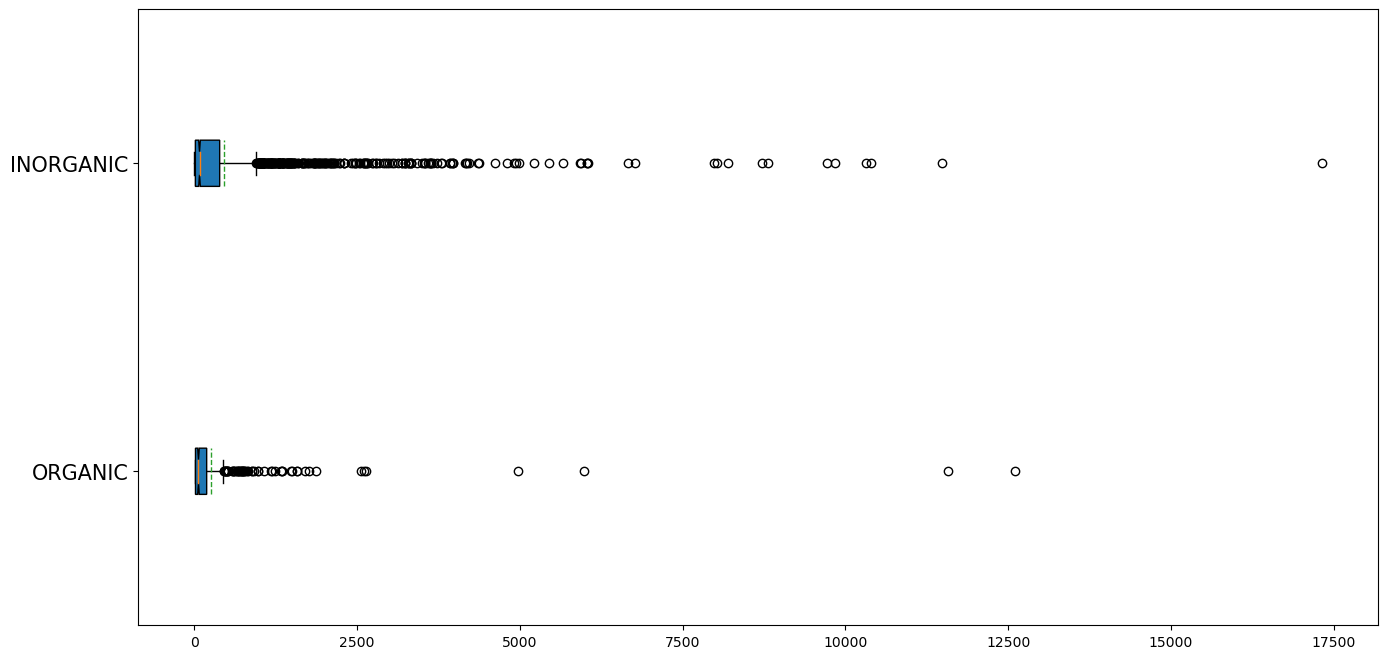

In [236]:
fig = plt.figure(figsize =(16, 8))
data = [organic_sum, inorganic_sum]


plt.boxplot(data, vert=0, notch=True, patch_artist=True, meanline=True, showmeans=True)
plt.yticks([1, 2], ['ORGANIC', 'INORGANIC'], rotation=0, fontsize = 15)

## 5. PRODUCT PRICE TREND

In [384]:
organic_prices = pd.merge(organic_counts, ORGANIC_ITEMS, how='inner')

In [385]:
organic_prices = organic_prices.drop_duplicates(subset='CLASS_NAME', keep='first')

In [386]:
inorganic_prices = pd.merge(inorganic_counts, ORGANIC_ITEMS, how='inner')

In [387]:
inorganic_prices = inorganic_prices.drop_duplicates(subset='CLASS_NAME', keep='first')

In [388]:
organic_prices.drop('ORGANIC_IND',inplace=True, axis=1)

In [389]:
organic_prices.drop('TOTAL',inplace=True, axis=1)

In [390]:
organic_prices.drop('UNITS_SOLD',inplace=True, axis=1)

In [394]:
organic_prices = organic_prices.set_index('CLASS_NAME').transpose()

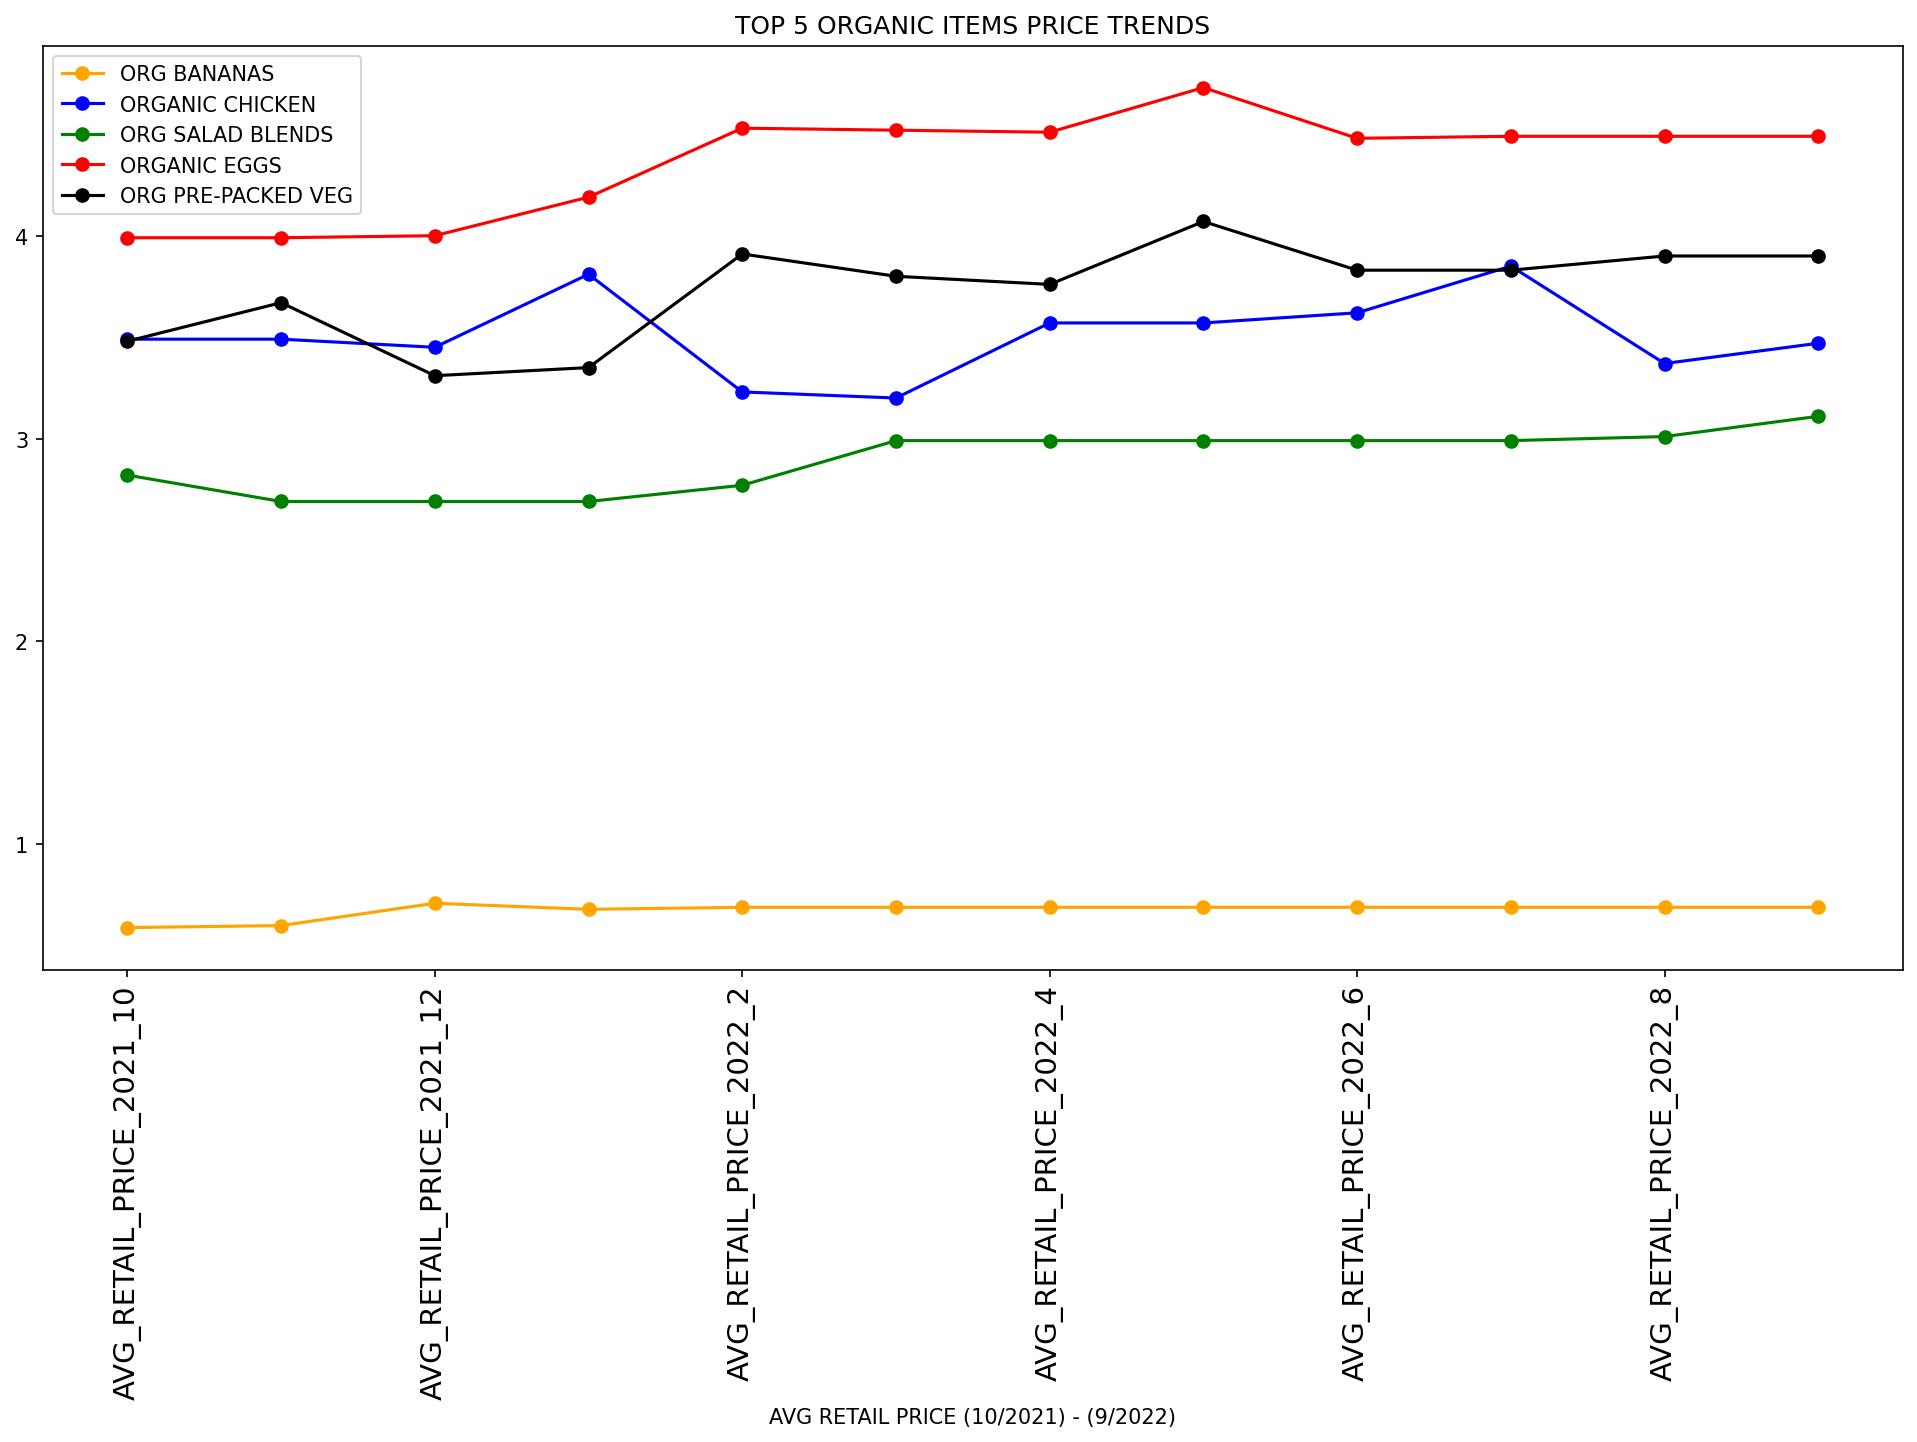

In [406]:
## PLOT TRENDS FOR TOP 5 ITEMS
plt.figure(figsize=(16, 8), dpi=150)
  

organic_prices['ORG BANANAS'].plot.line(label='ORG BANANAS', color='orange',  marker='o')
organic_prices['ORGANIC CHICKEN'].plot(label='ORGANIC CHICKEN', color='blue', marker='o')
organic_prices['ORG SALAD BLENDS'].plot(label='ORG SALAD BLENDS', color='green' , marker='o')
organic_prices['EGGS'].plot(label='ORGANIC EGGS', color='red',  marker='o')
organic_prices['ORG PRE-PACKED VEG'].plot(label='ORG PRE-PACKED VEG', color='black',  marker='o')

  
plt.title('TOP 5 ORGANIC ITEMS PRICE TRENDS')
plt.xlabel('$')
plt.xlabel('AVG RETAIL PRICE (10/2021) - (9/2022)')
plt.xticks(rotation = 90 ,fontsize = 14 ) 
plt.legend()

## 6. ORIGINAL ITEM VS SUBISTITUTE

In [265]:
sub_original_count = transactions_item_data.groupby(['FULFILLED_ITEM_TYPE']).sum()

<AxesSubplot:xlabel='FULFILLED_ITEM_TYPE'>

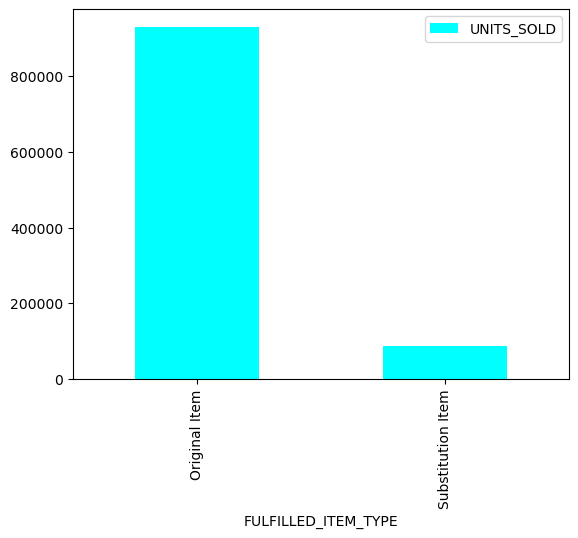

In [273]:
sub_original_count[[ 'UNITS_SOLD' ]].plot(kind='bar', color=clr)

## 7. Find Item Sizes and Units

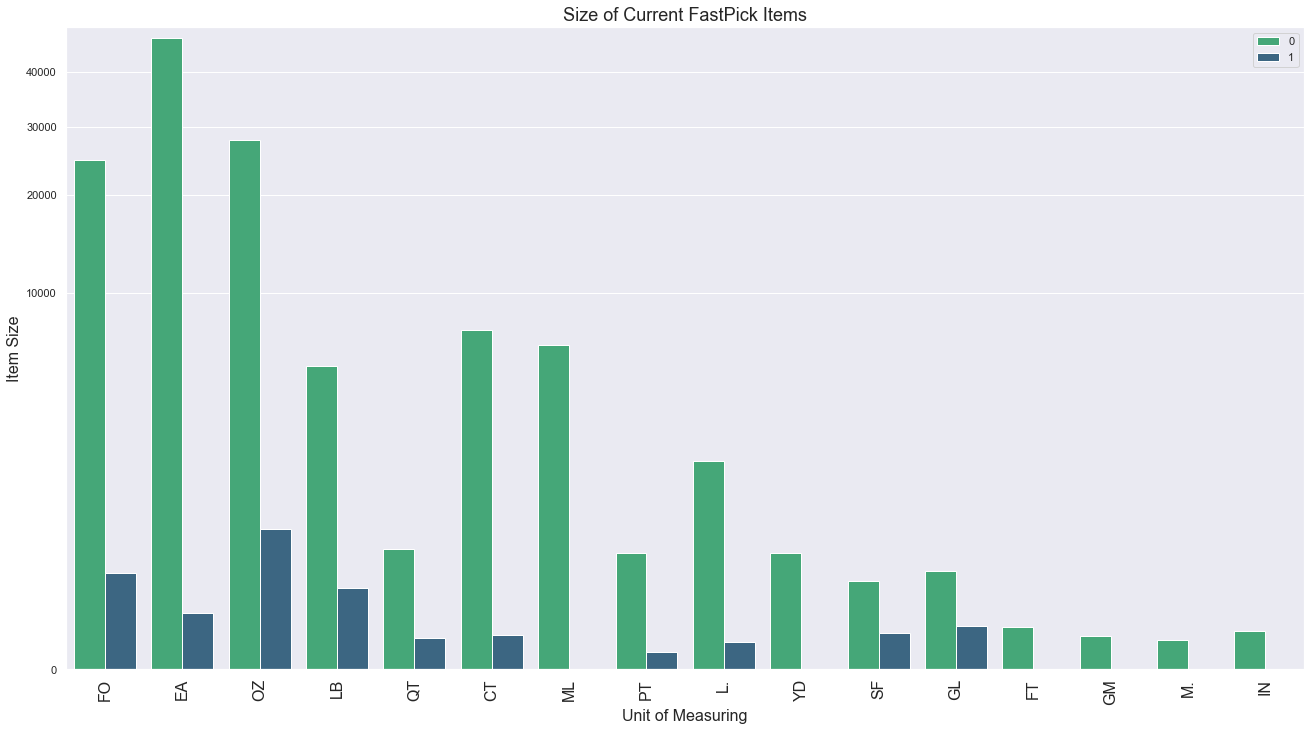

In [177]:

sns.set_style('darkgrid')

# plot title
plt.title('Size of Current FastPick Items', fontsize = 18)



# x label rotation 
plt.xticks(rotation = 90 ,fontsize = 16 )

# tight_layout
plt.tight_layout()

sns.countplot(x = items.ITEM_UOM_DESC,
             
             data=items,
             hue=items.IS_CURRENT_WOODMORE_FASTPICK_FLG,
             palette='viridis_r')
# scale y-axis for better visualization 
plt.yscale('function', functions=(forward, inverse))
plt.legend(loc='upper right')
# Figure size 
# plot x and y labels
plt.xlabel('Unit of Measuring', size=16)
plt.ylabel('Item Size', size=16)
sns.set(rc={"figure.figsize":(18, 10)})
plt.show()

## 8. Sizes of FastPick Items

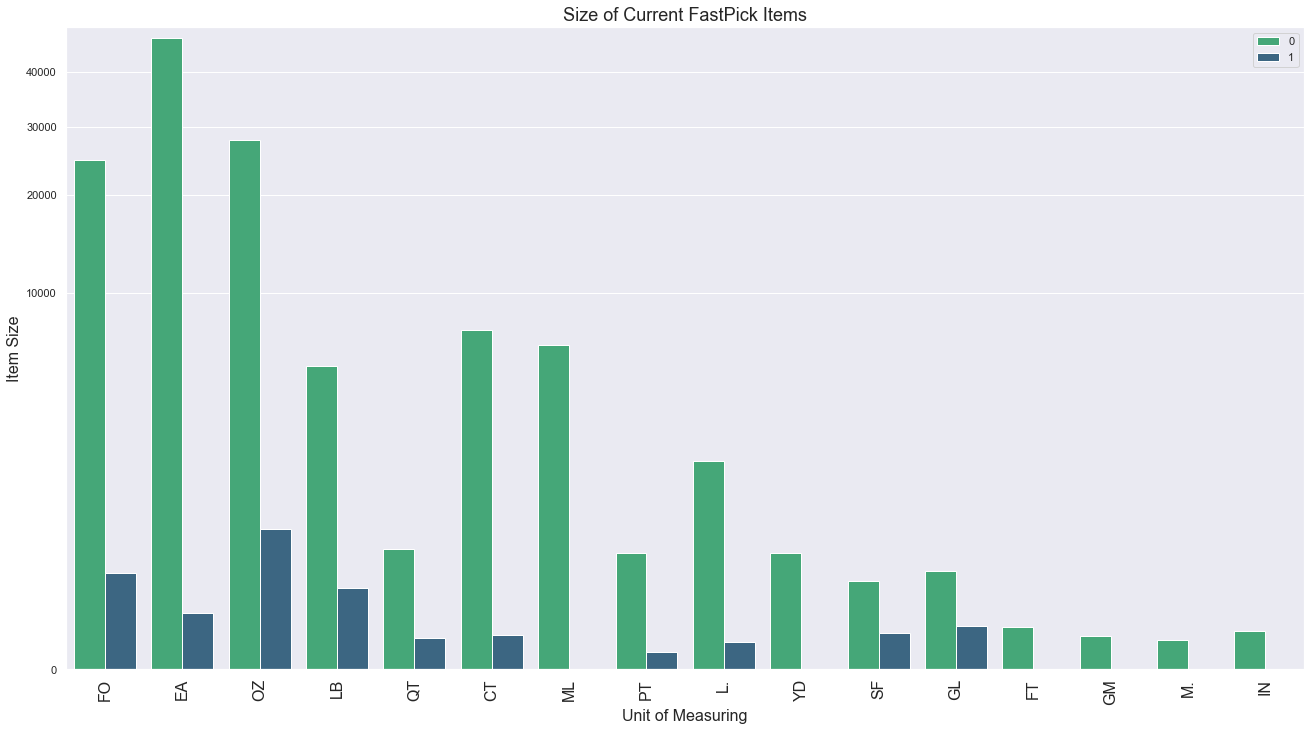

In [177]:

sns.set_style('darkgrid')

# plot title
plt.title('Size of Current FastPick Items', fontsize = 18)



# x label rotation 
plt.xticks(rotation = 90 ,fontsize = 16 )

# tight_layout
plt.tight_layout()

sns.countplot(x = items.ITEM_UOM_DESC,
             
             data=items,
             hue=items.IS_CURRENT_WOODMORE_FASTPICK_FLG,
             palette='viridis_r')
# scale y-axis for better visualization 
plt.yscale('function', functions=(forward, inverse))
plt.legend(loc='upper right')
# Figure size 
# plot x and y labels
plt.xlabel('Unit of Measuring', size=16)
plt.ylabel('Item Size', size=16)
sns.set(rc={"figure.figsize":(18, 10)})
plt.show()